In [1]:
from model import Model
from plot_vp import plot_vp
from policy_iteration import policy_iteration
from value_iteration import value_iteration, value_iteration_async
from sarsa import sarsa, expected_sarsa
from q_learning import q_learning
from world_config import cliff_world, grid_world, small_world
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm

## Policy Iteration

In [6]:
model = Model(grid_world)
V_PI, pi_PI = policy_iteration(model)

  9%|▉         | 9/100 [00:06<01:08,  1.32it/s]

breaking


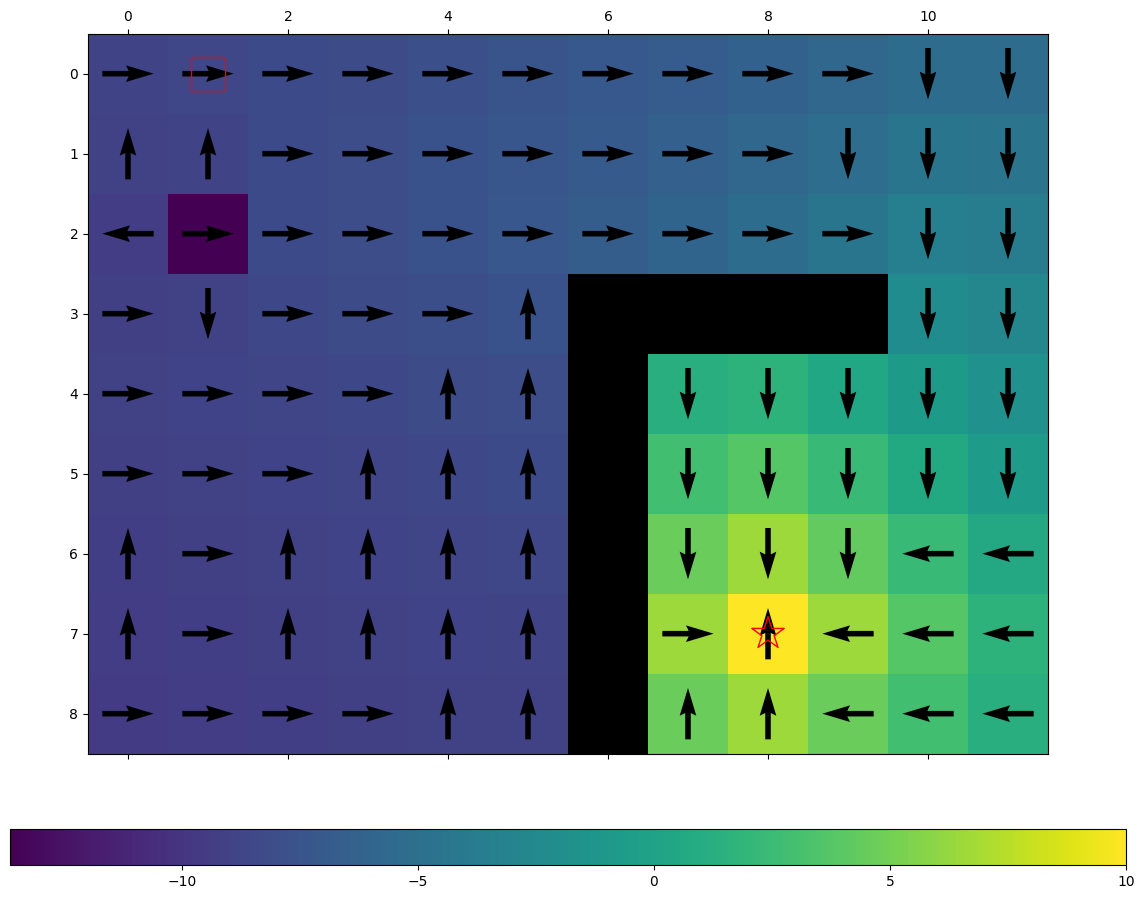

In [27]:
plot_vp(model, V_PI, pi_PI)
plt.savefig('plots/PI-grid.png')

## Q1 - Value Iteration

### 1. Sychronize

In [16]:
model = Model(grid_world)
V_VI, pi_VI, history_VI = value_iteration(model, threshold=0.001)

 45%|████▌     | 45/100 [00:10<00:13,  4.12it/s]


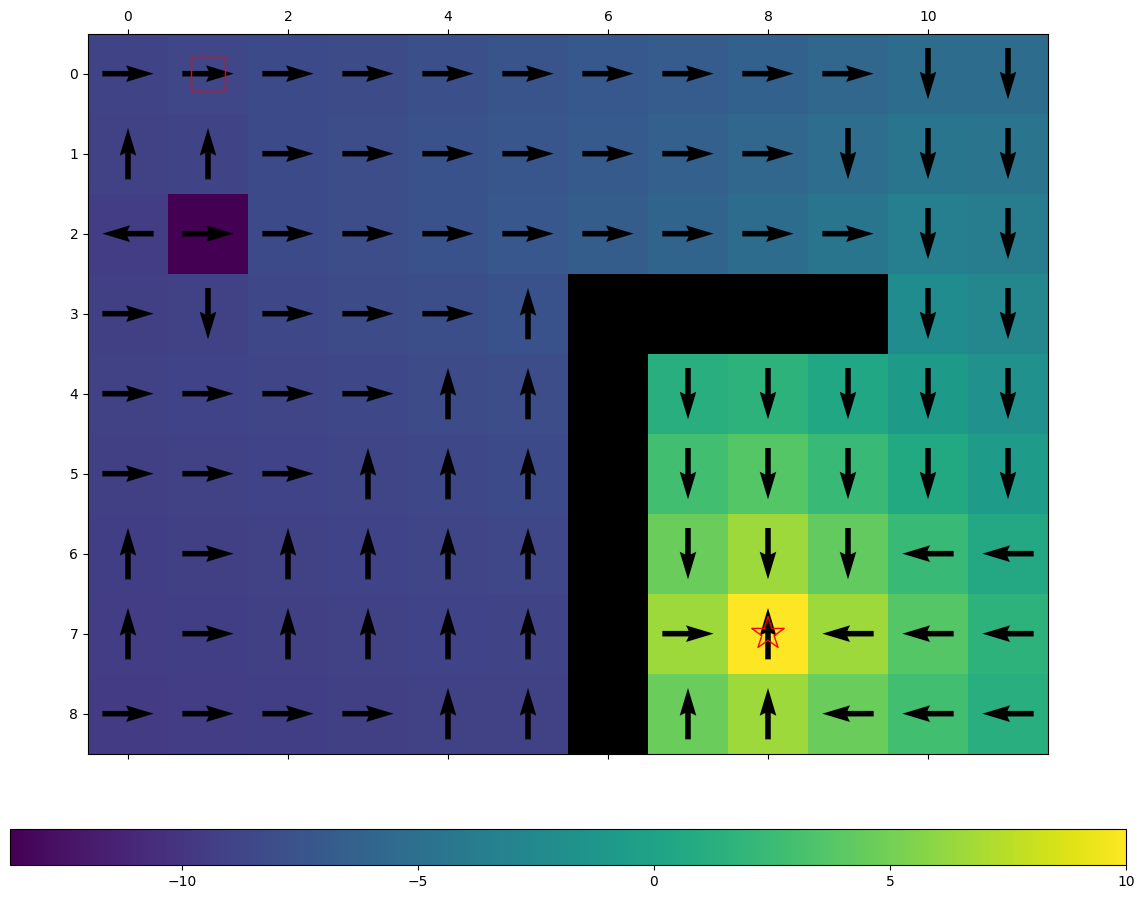

In [28]:
plot_vp(model, V_VI, pi_VI)
plt.savefig('plots/VI-grid.png')

In [19]:
assert np.all(pi_VI == pi_PI)

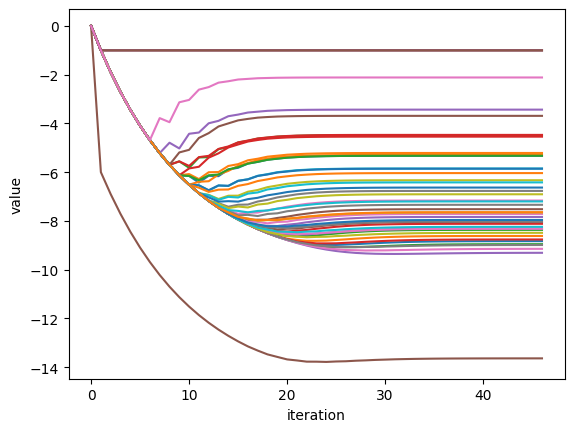

In [29]:
Vs = np.vstack(history_VI)
Vs.shape
for i in range(Vs.shape[0]):
    plt.plot(np.arange(Vs.shape[0]), Vs[:, i])
plt.xlabel('iteration')
plt.ylabel('value')
plt.savefig('plots/Value-iteration-convergence.png')

### 2. Asychonize

 30%|███       | 30/100 [00:07<00:17,  4.05it/s]


(<Figure size 1440x1080 with 2 Axes>, <Axes: >)

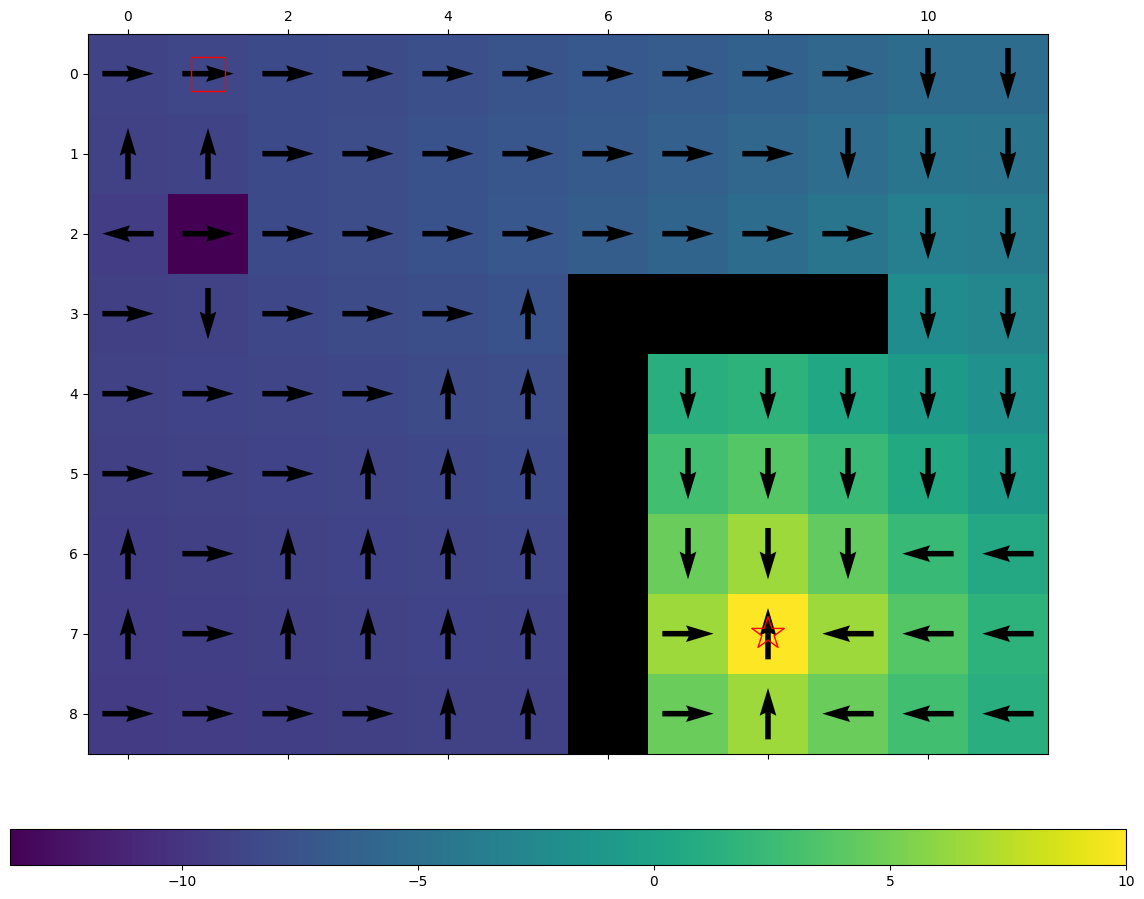

In [23]:
V_async, pi_async, history_VI_async = value_iteration_async(model, threshold=0.001)
plot_vp(model, V_async, pi_async)

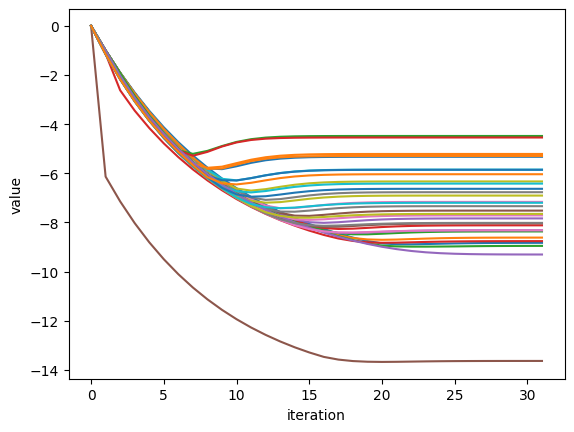

In [30]:
Vs = np.vstack(history_VI_async)
Vs.shape
for i in range(Vs.shape[0]):
    plt.plot(np.arange(Vs.shape[0]), Vs[:, i])
plt.xlabel('iteration')
plt.ylabel('value')
plt.savefig('plots/Async-Value-iteration-convergence.png')

## Q2

### 1. SARSA

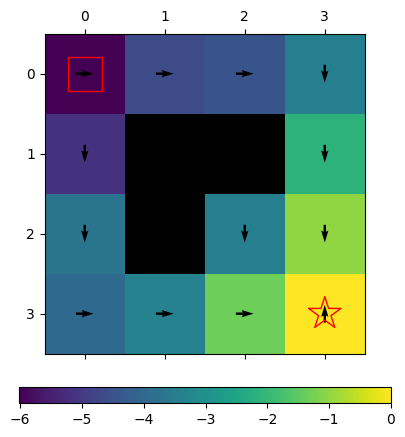

In [14]:
model = Model(small_world)
V, pi, _ = sarsa(model, n_episode=1000, alpha=0.5)
plot_vp(model, V, pi)
plt.savefig('plots/sarsa-small.png')

### Expected-SARSA

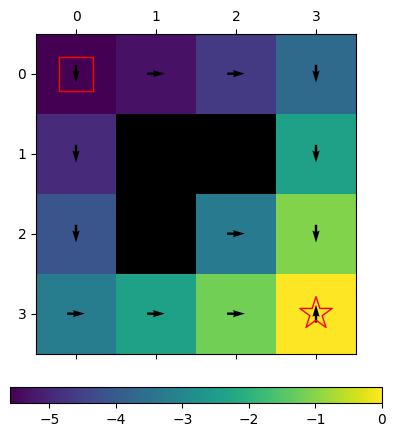

In [16]:
model = Model(small_world)
V, pi, _ = expected_sarsa(model, n_episode=1000, alpha=0.5)
plot_vp(model, V, pi)
plt.savefig('plots/expected-sarsa-small.png')

## Q3 - Q-Learning

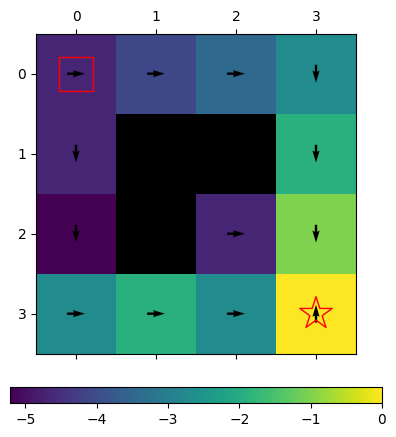

In [17]:
model = Model(small_world)
V, pi, _ = q_learning(model, alpha=1., n_episode=1000)
plot_vp(model, V, pi)
plt.savefig('plots/q-learning-small.png')

## Q4 - Accumulate Rewards

In [9]:
model = Model(cliff_world)
epsilon = 0.1
alpha = 0.3
n_episode = 1000
n_reps = 100
maxit = 200
cum_r_q_learning = np.zeros(n_episode)
cum_r_sarsa = np.zeros(n_episode)
cum_r_expected_sarsa = np.zeros(n_episode)

for _ in tqdm(range(n_reps)):
    V_q_learning, pi_q_learning, rewards_q_learning = q_learning(model, epsilon=epsilon, alpha=alpha, n_episode=n_episode, maxit=maxit)
    V_sarsa, pi_sarsa, rewards_sarsa = sarsa(model, epsilon=epsilon, alpha=alpha, n_episode=n_episode, maxit=maxit)
    cum_r_q_learning += rewards_q_learning
    cum_r_sarsa += rewards_sarsa
cum_r_q_learning /= n_reps
cum_r_sarsa /= n_reps


  0%|          | 0/100 [00:00<?, ?it/s]

/var/folders/pk/pw1_b29x4xxgr4txkszp_3ph0000gn/T/ipykernel_52659/1616841961.py:1: DeprecationWarning: Please use `uniform_filter1d` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import uniform_filter1d


Text(0, 0.5, 'Accumulate rewards')

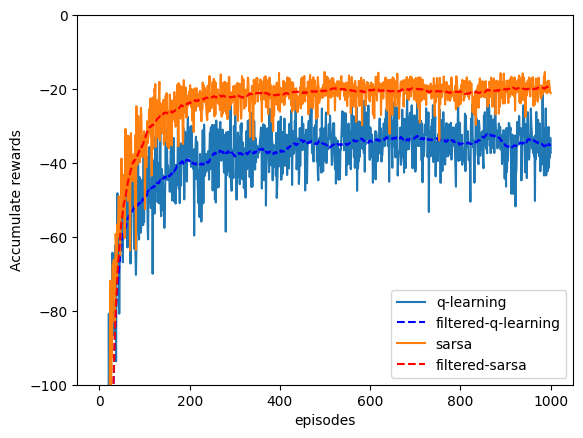

In [12]:
from scipy.ndimage.filters import uniform_filter1d

# plt.figure(figsize=(8, 4))
episodes = np.arange(1, n_episode + 1)
plt.plot(episodes, cum_r_q_learning)
plt.plot(episodes, uniform_filter1d(cum_r_q_learning, size=50), 'b--')
plt.plot(episodes, cum_r_sarsa)
plt.plot(episodes, uniform_filter1d(cum_r_sarsa, size=50), 'r--')
plt.legend(['q-learning', 'filtered-q-learning', 'sarsa', 'filtered-sarsa'])
plt.ylim([-100, 0])
plt.xlabel('episodes')
plt.ylabel('Accumulate rewards')

(<Figure size 1200x600 with 2 Axes>, <Axes: >)

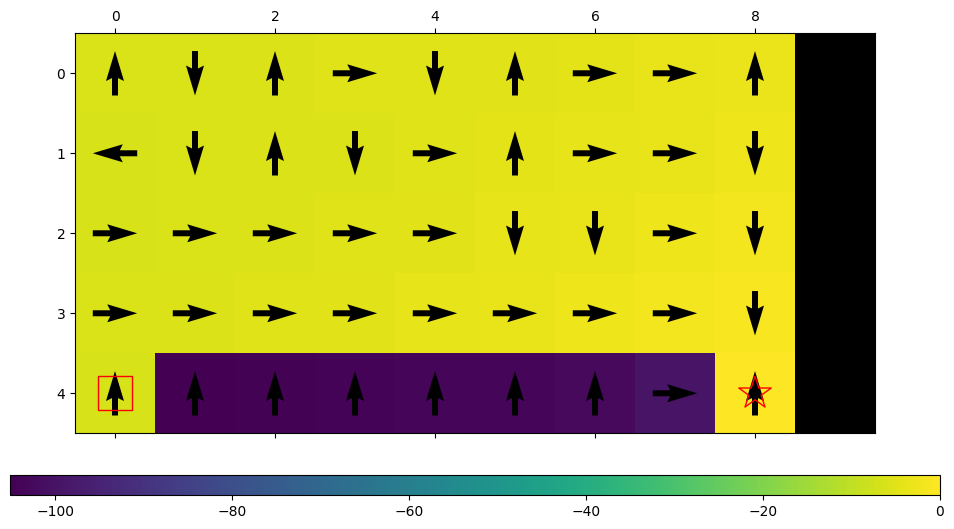

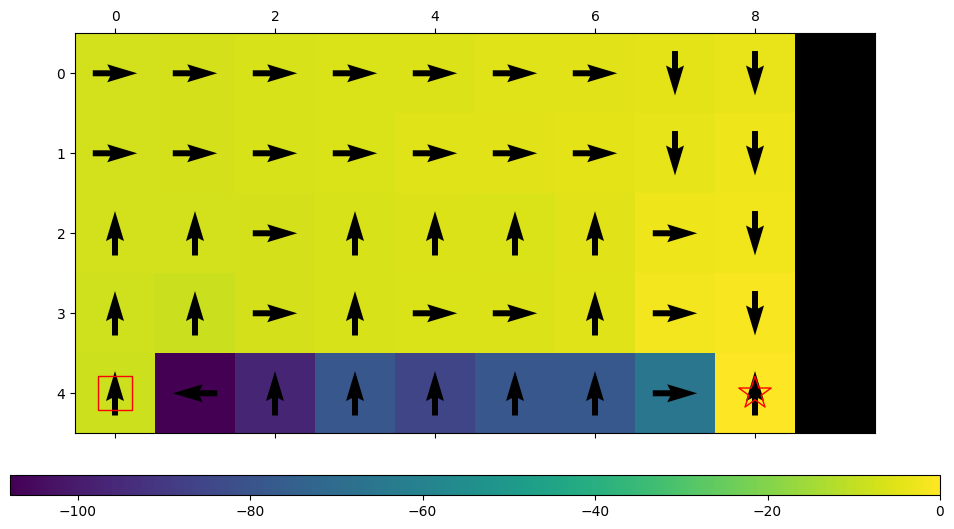

In [13]:
plot_vp(model, V_q_learning, pi_q_learning)
plot_vp(model, V_sarsa, pi_sarsa)